# Introduction to Data Science - Homework 4
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 9, 11:59pm.

In this homework you will download SLC air quality data and compute a moving average. Then you'll complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

*First Name:*   Brooke <br>
*Last Name:*   Stanislawski <br>
*E-mail:*   brooke.stanislawski@utah.edu <br>
*UID:*  u1142223


In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality at Hawthorn Elementary School in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about air quality in SLC here: http://slcair.communication.utah.edu/


### Task 1.1. Download data
The EPA gives access to air quality data on the AirData website. Become familiar with the cite by reading this [information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
1. Pollutant = PM2.5
+ Year = 2017
+ City = Salt Lake City, UT
+ Monitor Site = 490353006 (Hawthorn Elementary School)



### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

1. The dates are not sorted. 
+ some dates may have missing values.
+ some dates may have multiple values corresponding to different collection sites (POC=1,4,5).   


In [2]:
# your code goes here
aqd_csv = pd.read_csv("2017airqualitydata.csv")
aqd = pd.DataFrame(aqd_csv)
aqd.head()

,Date,AQS_SITE_ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/05/2017,490353006,1,5.4,ug/m3 LC,23,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
1,01/06/2017,490353006,1,16.3,ug/m3 LC,60,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
2,01/07/2017,490353006,1,36.5,ug/m3 LC,103,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
3,01/10/2017,490353006,1,1.2,ug/m3 LC,5,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
4,01/11/2017,490353006,1,2.4,ug/m3 LC,10,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222


### Task 1.3. Plot the data

Plot the daily mean PM2.5 concentration and daily AQI value. Since there are multiple POCs for each day, plot the data in each of the following ways:
1. Average the daily mean PM2.5 concentration and daily AQI value over the POCs for each day. In a single figure, plot date vs. each of these two quantities. 
+ Make two plots, one for daily mean PM2.5 concentration and the other for daily AQI value. In the first plot, plot the daily mean PM2.5 concentration for each POC value (POC=1,4,5) seperately. In the second plot, plot the daily AQI value for each POC value (POC=1,4,5) seperately. 

*Hint*: use the pandas groupby function


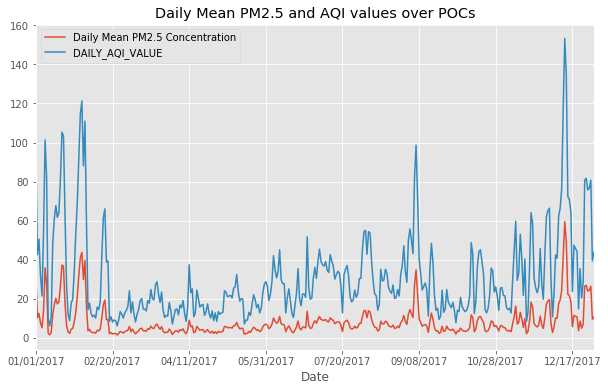

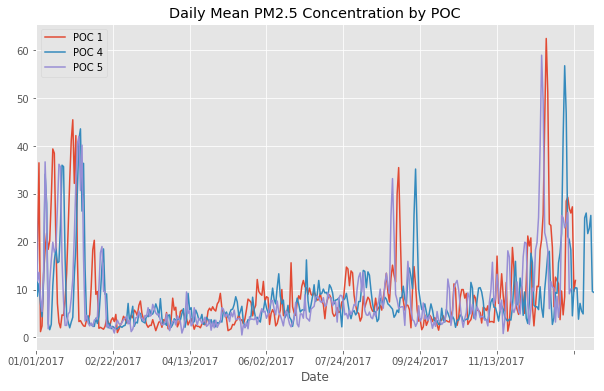

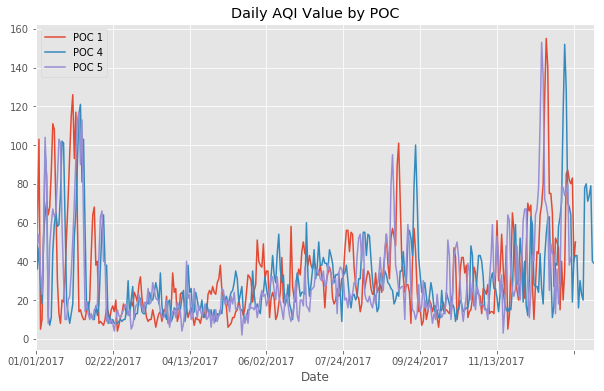

In [25]:
# your code goes here
fig1 = plt.figure()
aqd.groupby("Date").mean()[["Daily Mean PM2.5 Concentration", "DAILY_AQI_VALUE"]].plot(title="Daily Mean PM2.5 and AQI values over POCs")

fig, ax = plt.subplots()
aqd.groupby("POC").plot(x="Date",y="Daily Mean PM2.5 Concentration",ax=ax,title="Daily Mean PM2.5 Concentration by POC")
plt.legend(["POC 1", "POC 4", "POC 5"])

fig, ax = plt.subplots()
aqd.groupby("POC").plot(x="Date",y="DAILY_AQI_VALUE",ax=ax,title="Daily AQI Value by POC")
plt.legend(["POC 1", "POC 4", "POC 5"])

### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function as in Lecture 7. 

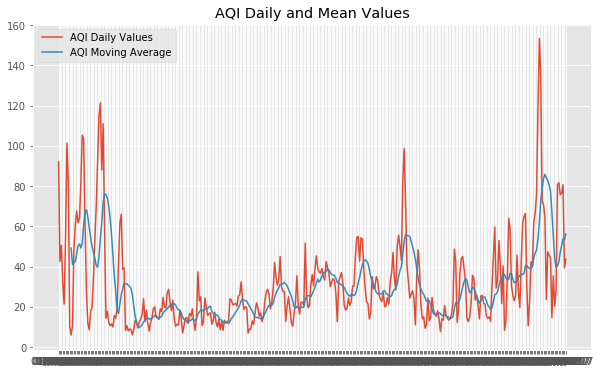

In [26]:
# your code goes here
import numpy as np
fig4 = plt.figure()
aqi = aqd_date.mean()[["DAILY_AQI_VALUE"]]
mvg_avg = np.round(aqi["DAILY_AQI_VALUE"].rolling(window = 10, center = False).mean(), 2)
# experimented with window = 5, 10, 20, and 30 --> 10 looks appropriate because it captures the up and downward trends,
# but doesn't oscillate all the way out to the absolute maxima and minima
plt.plot(aqi, label="AQI Daily Values")
plt.plot(mvg_avg, label="AQI Moving Average")
plt.legend()
plt.title("AQI Daily and Mean Values")
plt.show()

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new logo. The art department develops two logos: ‘Logo A’ and ‘Logo B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which logo is better. 


You decide to conduct the following experiment. You use Google ads to buy 2000 advertisements. In $N_A=1000$ of the ads (randomly chosen), you use Logo A and in the other $N_B=1000$ ads, you use Logo B. Then you see which logo attracts more clicks.

It turns out that $n_A=500$ Logo A viewers click on the ad while $n_B=550$ Logo B viewers click on the ad. Obviously Logo B did better in this test, but is the difference *significant* enough to say that Logo B is better? Or, perhaps, Logo B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Logo B is better. The steps will be similiar to those from Lecture 8 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Logo A and similiarly $p_B$ be the proportion of clicks on Logo B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

**Your Solution:** The null hypothesis is that
$$
H_0\colon p_A - p_B \leq 0,
$$
meaning that logo B is at least as effective as logo A.

The alternative hypothesis,
$$
H_a\colon p_A - p_B >0, 
$$
states that logo A is more effective.

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

In [6]:
# your code goes here

nA = 500
NA = 1000
pA = nA/NA
muA = pA
sigmaA = sc.sqrt(pA*(1-pA)/NA)

nB = 550
NB = 1000
pB = nB/NB
muB = pB
sigmaB = sc.sqrt(pB*(1-pB)/NB)

phat = NA*pA/(NA+NB) + NB*pB/(NA+NB)
qhat = 1-phat

z = (pA - pB)/sc.sqrt(phat*qhat*(1/NA + 1/NB)) 
print(z)

-2.2388683142


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test.

In [8]:
# your code goes here
p_value = 1-norm.cdf(z)
print(p_value)

0.98741775715


### Task 2.4. Interpretation

Interpret the $p$-value in this example and  state the result of the hypothesis test at the $\alpha=5\%$ and $\alpha=1\%$ significance levels. 


**Your Interpretation:** The probability that an erroneous conclusion is reached, under the assumption of the null hypothesis (that logo B is at least as effective as logo A), is 98.7%, which is much much larger than the two values of alpha of 5% and 1%.  Therefore, we accept the null hypothesis and declare that logo B is at least as effective as logo A.  In other words, there is no substantial difference between their performance.